In [1]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

<IPython.core.display.Javascript object>


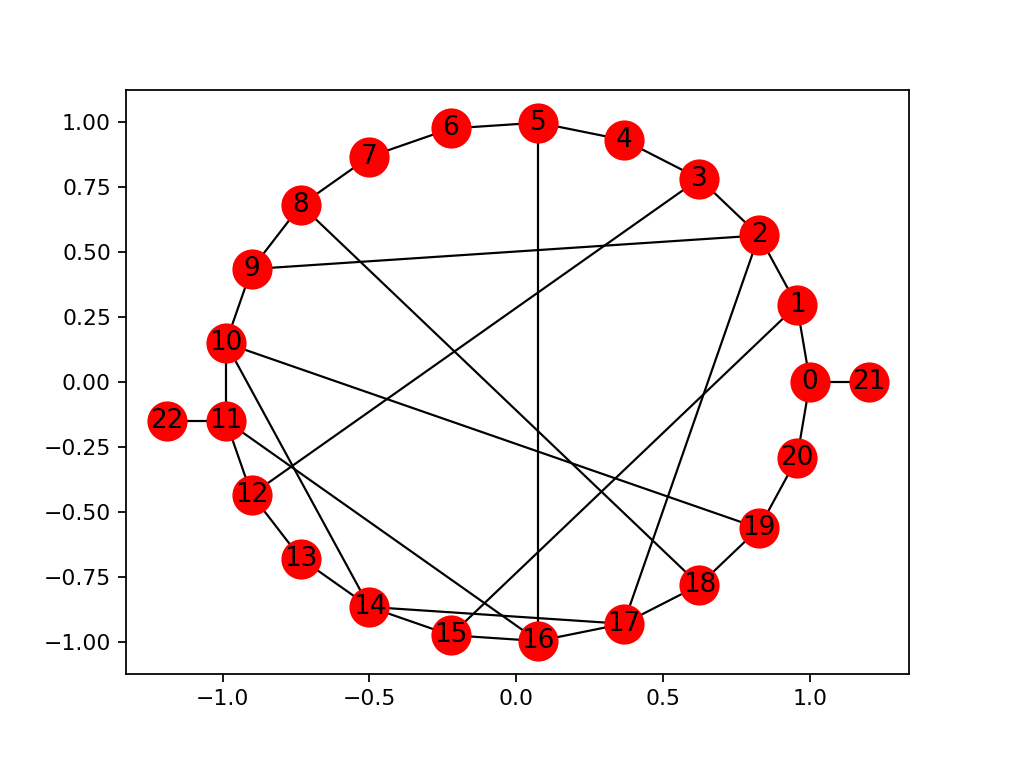

In [2]:
%matplotlib notebook

G = nx.newman_watts_strogatz_graph(21, 3, 0.4)
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

#add one ouput channel
G.add_edge(len(G),0)
pos[len(G)-1] = pos[0]+[0.2,0]
G.add_edge(len(G),11)
pos[len(G)-1] = pos[11]+[-0.2,0]

chi = np.array([ 1.j for i in range(len(G.edges))])

plt.figure()
nx.draw_networkx(G,pos=pos)

In [3]:
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', transport_graph = True)
naq_u1.set_chi(10.01*naq_u1.chi0) #set the wavenumber

naq_u1.input_nodes = [len(G)-1] #which nodes are input nodes
naq_u1.input_values = [1.]  #fix the input flux on all the nodes
naq_u1.output_nodes = [len(G)-2]
naq_u1.update_laplacian()
L = naq_u1.L0.todense()



In [4]:
naq_u1.test_laplacian()

0.022520324328856135

<IPython.core.display.Javascript object>


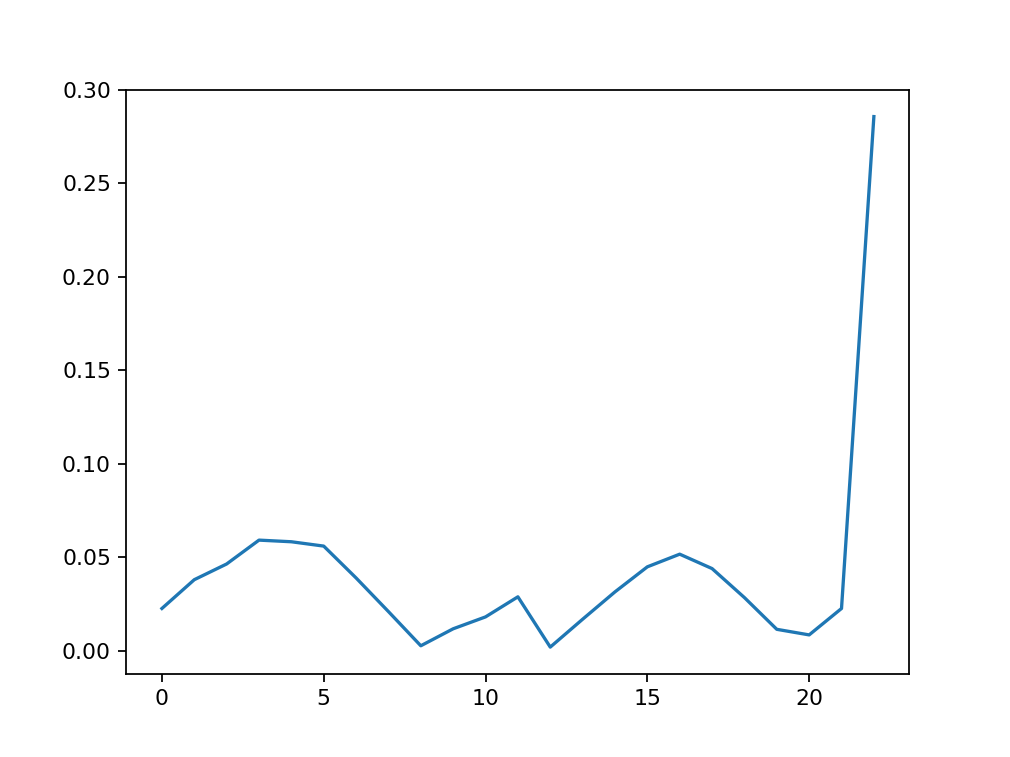

[ 0.02117352-7.67117735e-03j -0.03752255+5.50886715e-03j
  0.04624211-2.94976015e-03j -0.0590257 +3.07575815e-03j
  0.05816731-2.68700847e-03j -0.05586412+2.23151786e-03j
  0.03884375-1.17713015e-03j -0.02085855+9.35046256e-05j
  0.00235525+9.92443125e-04j  0.01143379-2.23334946e-03j
 -0.01776714+2.97527843e-03j  0.02868083-2.12188573e-03j
  0.00171322+6.84417908e-04j -0.01676177+1.26536203e-04j
  0.03139398-9.34347565e-04j -0.04476906+1.97695982e-03j
  0.05154251-2.12181039e-03j -0.04383809+1.85300693e-03j
  0.0283074 +1.46354111e-03j -0.0103026 -4.80456043e-03j
 -0.00550382+6.31631333e-03j -0.0018808 +2.24416487e-02j
 -0.28575722+5.07673782e-03j]


In [5]:
sol = naq_u1.compute_solution()
plt.figure()
plt.plot(abs(sol))
print(sol)

<IPython.core.display.Javascript object>


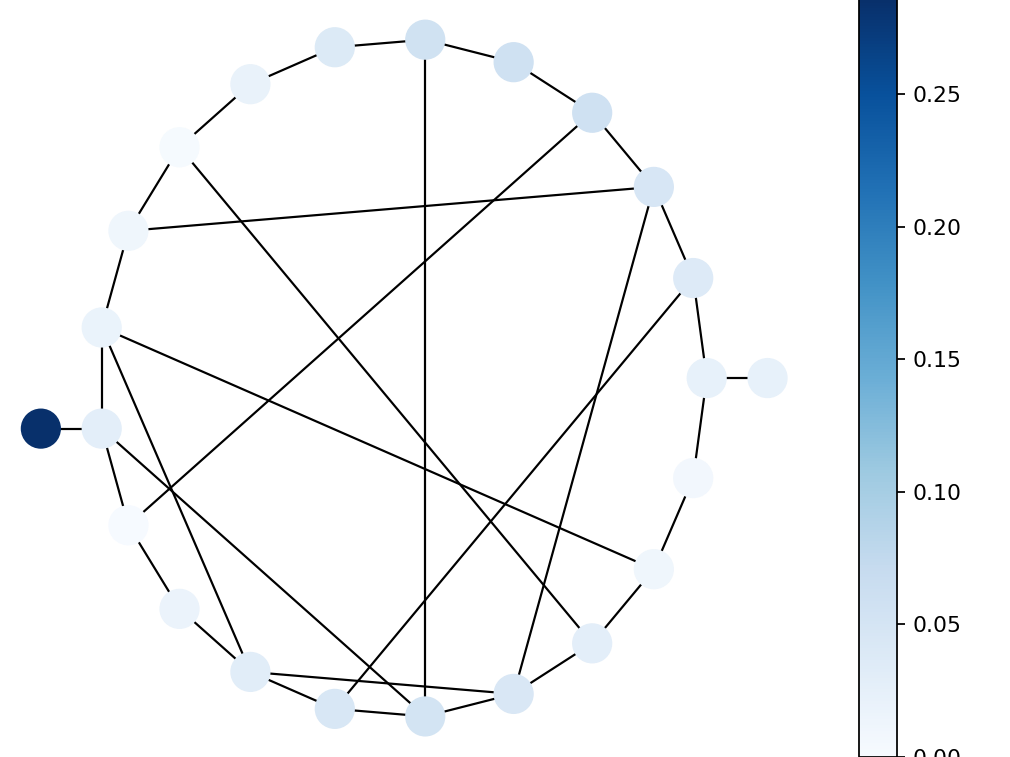

In [6]:
plt.figure()
sol_plot = abs(sol)
vmin=0#np.min(sol_plot)
vmax=np.max(sol_plot)
nx.draw(G, pos=pos, node_color = sol_plot,cmap='Blues',vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

In [43]:
#this finds modes which have no output fluxes
Ks = np.linspace(1.1, 2.9, 50)
k_mu = naq_u1.compute_spectrum_U1( Ks,3)


In [64]:
#scan the spectrum k
K = np.linspace(1., 3., 10000)
s = np.zeros(len(K))

for i,k in enumerate(K):
    naq_u1.set_chi(k*chi)
    s[i] = naq_u1.test_laplacian()


<IPython.core.display.Javascript object>


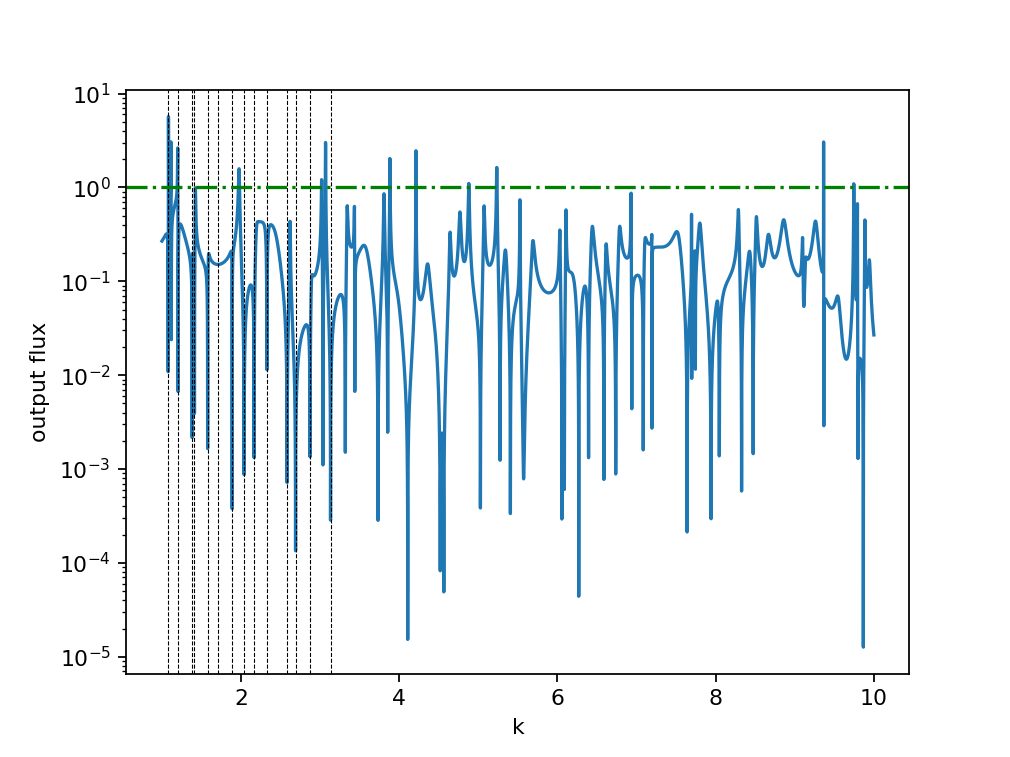

Text(0,0.5,'output flux')

In [63]:
#plot the spectrum
plt.figure()
plt.semilogy(K,np.abs(s))
for k in k_mu:
    plt.axvline(k,ls = '--',c='k' ,lw=0.5)
    
plt.axhline(np.sum(naq_u1.input_values),ls='-.',c='g')
plt.xlabel('k')
plt.ylabel('output flux')


output flux: 0.016758468958801016


<IPython.core.display.Javascript object>


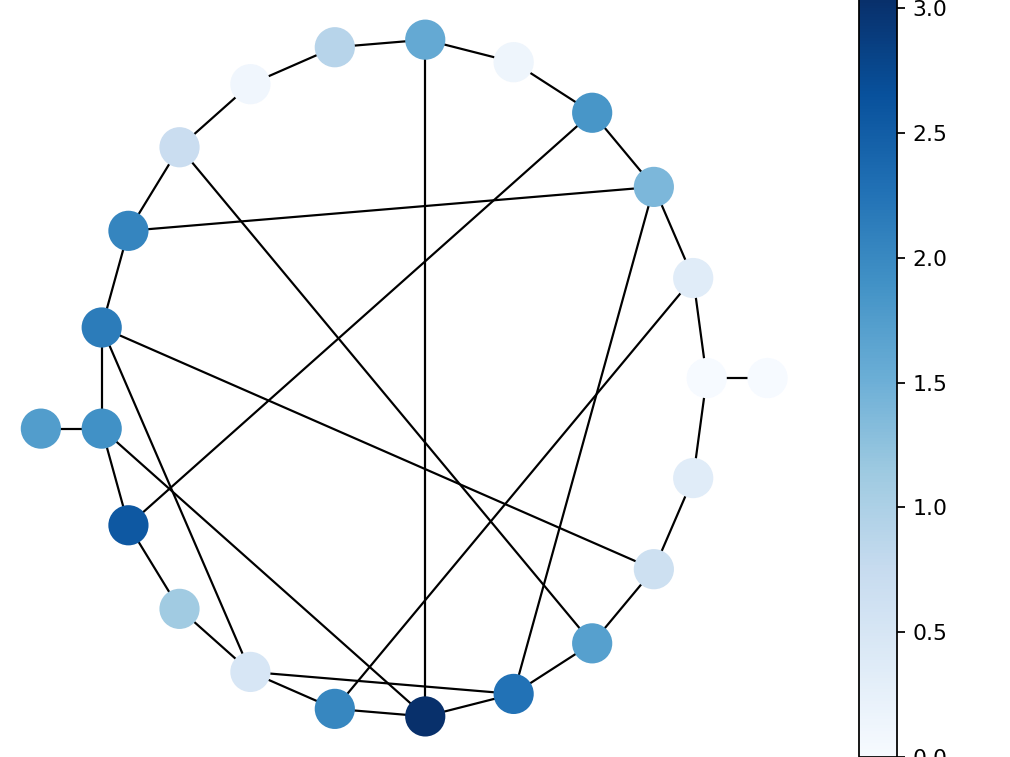

In [58]:
#plot the modes with no output on the graph
m = 1 #which mode to plot
naq_u1.set_chi(k_mu[m]*naq_u1.chi0) #set the wavenumber
naq_u1.update_laplacian()
sol = naq_u1.compute_solution()
print("output flux:", abs(sol[naq_u1.output_nodes]).sum())

plt.figure()
sol_plot = np.abs(sol)
vmin=0 #np.min(sol_plot)
vmax=np.max(sol_plot)
nx.draw(G, pos=pos, node_color = sol_plot,cmap='Blues',vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)